In [287]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import logsumexp

In [288]:
class MixtureOfGaussiansCAVI(object):
    def __init__(self, var_mu:float, K:int):
        self._K = K
        self._var_mu = var_mu
        
    def fit(self, x:np.ndarray):
        N = x.size
        m = np.random.rand(self._K) * 20
        s_2 = np.random.rand(self._K) * 20
        phi = np.random.rand(N, self._K)
        i = 0
        while i < 100:
            phi = self._update_phi(x, m, s_2)
            m = self._update_m(x, phi)
            s_2 = self._update_s_2(phi)
            print(self._elbo(x, m, s_2, phi))
            i += 1
        return (phi, m, s_2)
    
    ### Beginning ELBO Calculation ###
    
    def _elbo(self, x:np.ndarray, m:np.ndarray, s_2:np.ndarray, phi:np.ndarray) -> float:
        return self._sum_E_log_p_mu_k(m, s_2) \
                + self._sum_E_log_p_x_i(x, phi, m, s_2) \
                - self._sum_E_log_q_c_i(phi) - self._sum_E_log_q_mu_k(s_2)
    
    def _sum_E_log_p_mu_k(self, m:np.ndarray, s_2:np.ndarray) -> float:
        return -np.sum(s_2 + np.square(m)) / (2 * self._var_mu)
    
    def _sum_E_log_p_x_i(self, x:np.ndarray, phi:np.ndarray, m:np.ndarray, s_2:np.ndarray) -> float:
        return np.dot(np.dot(phi, m), x) - np.sum(np.dot(phi, (s_2 + np.square(m))))
    
    def _sum_E_log_q_c_i(self, phi:np.ndarray) -> float:
        return np.sum(np.apply_along_axis(lambda phi_i: np.dot(phi_i, np.log(phi_i)), 1, phi))
    
    def _sum_E_log_q_mu_k(self, s_2:np.ndarray) -> float:
        return -0.5 * np.sum(np.log(s_2))
                      
    ### End ELBO Calculation ###
    
    ### Beginning Updates ###
    
    def _update_m(self, x:np.ndarray, phi:np.ndarray) -> np.ndarray:
        numerator = np.dot(x, phi)
        denominator = 1/self._var_mu + np.sum(phi, 0)
        return numerator / denominator
    
    def _update_s_2(self, phi:np.ndarray) -> np.ndarray:
        return 1 / (1 / self._var_mu + np.sum(phi, 0))
    
    def _update_phi(self, x:np.ndarray, m:np.ndarray, s_2:np.ndarray) -> np.ndarray:
        t = np.outer(x, m) - (s_2 + m**2) / 2
        s = logsumexp(t, axis=1)
        return np.exp((t.T - s).T)

    ### End Updates                  

In [289]:
model = MixtureOfGaussiansCAVI(1, 3)
model.fit(np.array([10, 20, 30, 40]))

262.4605000522049
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.4602792291601
262.460279

(array([[3.57858581e-029, 1.00000000e+000, 4.03072629e-017],
        [1.00000000e+000, 2.78454494e-048, 2.16477839e-086],
        [1.00000000e+000, 2.77472469e-124, 4.16059091e-184],
        [1.00000000e+000, 2.76493907e-200, 7.99643825e-282]]),
 array([2.25000000e+01, 5.00000000e+00, 4.03072629e-16]),
 array([0.25, 0.5 , 1.  ]))

In [290]:
model = MixtureOfGaussiansCAVI(1, 2)
model.fit(np.array([1, 20, 30, 40]))

250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922916008
250.58527922

(array([[1.00000000e+000, 5.39835562e-101],
        [5.40312573e-082, 1.00000000e+000],
        [1.54120019e-177, 1.00000000e+000],
        [4.39615541e-273, 1.00000000e+000]]),
 array([ 0.5, 22.5]),
 array([0.5 , 0.25]))

In [291]:
num_components = 3
mu_arr = np.random.choice(np.arange(-10, 10, 2),
                          num_components) +\
         np.random.random(num_components)
mu_arr

array([-9.99872767,  0.70564457, -3.89501457])

In [292]:
SAMPLE = 1000

In [293]:
X = np.random.normal(loc=mu_arr[0], scale=1, size=SAMPLE)
for i, mu in enumerate(mu_arr[1:]):
    X = np.append(X, np.random.normal(loc=mu, scale=1, size=SAMPLE))

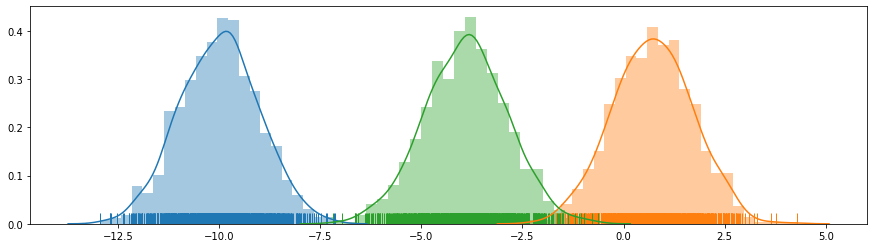

In [294]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.distplot(X[:SAMPLE], ax=ax, rug=True)
sns.distplot(X[SAMPLE:SAMPLE*2], ax=ax, rug=True)
sns.distplot(X[SAMPLE*2:], ax=ax, rug=True)

In [295]:
model = MixtureOfGaussiansCAVI(1, 3)
phi, m, s_2 = model.fit(X)
m

34.62872937565022
469.9314953426282
724.3147072877163
589.6382034773214
272.04985026420405
127.48818539020746
110.41055622842747
109.50215253265591
109.44566056735485
109.43957933970147
109.43862274893561
109.4384537685075
109.43842316736145
109.43841759888328
109.43841658477572
109.43841640013939
109.4384163663653
109.43841636024096
109.4384163592684
109.43841635898379
109.4384163590112
109.43841635900039
109.43841635907123
109.4384163590418
109.43841635902724
109.43841635901266
109.43841635902723
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
109.43841635904177
10

array([ 0.7118547 , -9.97764305, -3.89864992])

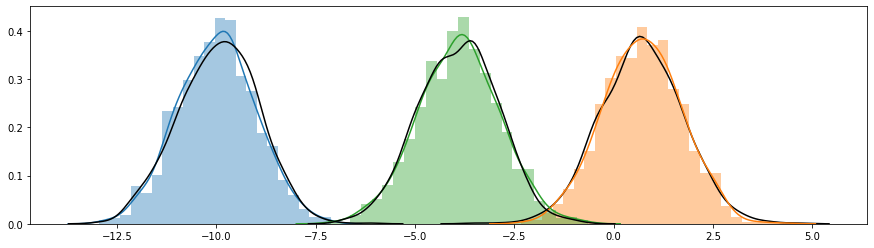

In [296]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.distplot(X[:SAMPLE], ax=ax, hist=True, norm_hist=True)

sns.distplot(np.random.normal(m[0], 1, SAMPLE), color='k', hist=False, kde=True)

sns.distplot(X[SAMPLE:SAMPLE*2], ax=ax, hist=True, norm_hist=True)

sns.distplot(np.random.normal(m[1], 1, SAMPLE), color='k', hist=False, kde=True)

sns.distplot(X[SAMPLE*2:], ax=ax, hist=True, norm_hist=True)

sns.distplot(np.random.normal(m[2], 1, SAMPLE), color='k', hist=False, kde=True)